# Part I: Multi-layer Perceptron with sklearn

- Author: Archit YADAV

## 1 Learning Boolean Operators

### 1. Classifier for AND operator

In [ ]:
#import classifier as classifier
import numpy as np
from sklearn.neural_network import MLPClassifier 
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 0, 0, 1] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for OR operator

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 1] # Outputs

X_test = [[1., 0.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for XOR operator

#### (a)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (b)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (c)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4),
                           activation="tanh", solver='lbfgs', max_iter=1000)
classifier.fit(X, y)

classifier.predict(X_test)


array([0])

## 2 Image Classification

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dataset = load_digits()
X = dataset.data # inputs
y = dataset.target # Associated outputs

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state=3)
print(train_X.shape)

(1617, 64)


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(),
                           activation="identity",
                           solver='sgd', tol=1e-10, max_iter=1000000)
classifier.fit(train_X, train_y)
classifier.predict(test_X)

from sklearn.metrics import accuracy_score

test_y_pred = classifier.predict(test_X) # Predicted results
print(" Accuracy: ", accuracy_score(test_y, test_y_pred ))

 Accuracy:  0.9666666666666667


| Experiment No. | Hidden Layers | Activation | Solver | Iterations |   Accuracy   |
|:--------------:|:-------------:|:----------:|:------:|:----------:|:------------:|
|        1       |       0       |  identity  |  lbfgs |    1000    |  [0.93, 1.0] |
|        2       |       0       |    tanh    |  lbfgs |    1000    | [0.94, 0.97] |
|        3       |       0       |  logistic  |  lbfgs |    1000    |     0.94     |
|        4       |       0       |    reLU    |  lbfgs |    1000    | [0.93, 0.97] |


---

# Part II: PyTorch and CNN

## 1. PyTorch Tensor Basics

In [ ]:
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 4X4 tensor matrix
tensor = torch.ones(4, 4)
tensor = tensor + 2

# Add 1 to each element
tensor2 = tensor + 1

print(tensor)
print(tensor2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [ ]:
# tensor multiplication
tensor * tensor2

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.]])

## 2. Torch Autograd

Say, we want to compute the derivative of the following equation:

$Q = 3a^3 - b^2$

We know that

$\frac{\partial Q}{\partial a} = 9a^2$

and

$\frac{\partial Q}{\partial b} = -2b$

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

print(a)
print(b)

Q = 3*a**3 - b**2

tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)


In [ ]:
# Gradient of Q wrt itself = 1
external_grad = torch.tensor([1., 1.])

Q.backward(gradient=external_grad, retain_graph=True)

print("Gradient of Q wrt a:", a.grad)
print("Gradient of Q wrt a:", b.grad)

Gradient of Q wrt a: tensor([144., 324.])
Gradient of Q wrt a: tensor([-48., -32.])


In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [ ]:
prediction = model(data) # forward pass

loss = (prediction - labels).sum()
loss.backward() # backward pass

In [ ]:
# Load SGD optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Initiate gradient descent
optim.step() #gradient descent


## 3. LeNet Network for MNIST

The goal is to play around with a NN architecture and test it on
MNIST dataset for image based digit classification.
Comparison by tweaking various parameters and with
MLP model will also be done.

References:

* [PyTorch docs](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* [TDS article](https://towardsdatascience.com/implementing-yann-lecuns-lenet-5-in-pytorch-5e05a0911320)
* [Medium article](https://medium.datadriveninvestor.com/architecture-implementation-of-lenet-from-scratch-in-pytorch-709cc38c00a9)

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim


In [60]:
# Transformations on data
transform = transforms.Compose([transforms.Pad(2), transforms.ToTensor(),
                              transforms.Normalize((0.5,),
                                                   (0.5,)),
                              ])
# Normalize: to normalize the tensor with mean and std. dev.

### Download the dataset

In [4]:
!unzip data.zip

Archive:  data.zip
  inflating: data/MNIST/processed/test.pt  
  inflating: data/MNIST/processed/training.pt  
  inflating: data/MNIST/raw/t10k-images-idx3-ubyte  
 extracting: data/MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: data/MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: data/MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: data/MNIST/raw/train-images-idx3-ubyte  
 extracting: data/MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: data/MNIST/raw/train-labels-idx1-ubyte  
 extracting: data/MNIST/raw/train-labels-idx1-ubyte.gz  


In [61]:
# Download the datasets
download=False
trainset = datasets.MNIST('./data', download=download, train=True, transform=transform)
valset = datasets.MNIST('./data', download=download, train=False, transform=transform)

In [62]:
# Feed the datasets to DataLoader
# Read 64 images at a time
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataset_sizes = {'train':len(trainset), 'test':len(valset)}


### Plot few samples of the dataset

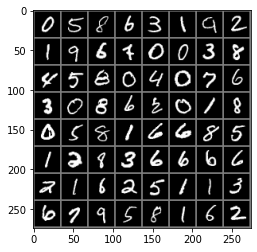

Labels of first row:

 0  5  8  6  3  1  9  2


In [63]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Labels of first row:\n")
print(' '.join('%2s' % classes[labels[j]] for j in range(8)))

In [64]:
images.size()

torch.Size([64, 1, 32, 32])

### The LeNet architecture

In [65]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, 
                              kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                              kernel_size = 5, stride = 1, padding = 0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, 
                              kernel_size = 5, stride = 1, padding = 0)
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)
        self.tanh = nn.Tanh()
        self.avgpool = nn.AvgPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv2(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv3(x)
        x = self.tanh(x)
        
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)
        return x
    

### Summary of the constructed model

In [66]:
from torchsummary import summary

# N_CLASSES = 10
model = LeNet()

x = torch.randn(64,1,32,32)
output = model(x)

print(model)
summary(model, (1,32,32))
print("output.shape : ", output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=10, bias=True)
  (tanh): Tanh()
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8        

### Define a loss function and optimizer

In [67]:
import torch.optim as optim

model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [84]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0

    # train phase
    model.train()

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # inputs = Variable(inputs.to(device))
        # labels = Variable(labels.to(device))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


### Plot few samples of labels (groundtruth)

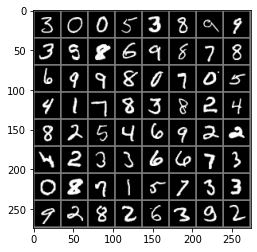

GroundTruth:   3  0  0  5  3  8  9  9


In [85]:
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%2s' % classes[labels[j]] for j in range(8)))

### Make a prediction for few samples

We take the images output from previous cell and feed them into our model to get some predictions.

The outputs are basically the index of the highest valued energy from the `outputs` variable

In [90]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%2s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:   7  8  6  7  1  3  8  4


### Testing on the complete dataset

In [87]:
correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %


In [88]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 98 %
Accuracy of     2 : 98 %
Accuracy of     3 : 98 %
Accuracy of     4 : 95 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 100 %
Accuracy of     8 : 95 %
Accuracy of     9 : 94 %


TODO:
* Make a table of different experiments
* Add proper comments


